## Import Library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set_theme()

## Import Dataset

In [24]:
conn = sqlite3.connect(r"B:\Documents\Web_Scrape_App\hotels.db")

df = pd.read_sql("SELECT * FROM hotel_data", conn)


## EDA

### Explore Data

In [25]:
print("Display the Frist 5 of Dataset")
display(df.head())

print("-"*200)

print("Data Type in the Dataset")
print(df.info())

print("-"*200)


print("Data Shape and Dimension")
print("Number of Columns: ",df.shape[1], "And" ,"Number of Rows: ", df.shape[0])


Display the Frist 5 of Dataset


,Hotel_Names,Prices,Distances,Rating
0,Summit Hotel Greenhills,"₱ 9,050",7.4 km from centre,7.8
1,Sea Residences MOA Pasay City - by Rose Stayca...,"₱ 5,880",7 km from centre,8.7
2,Sea Residences MOA Complex - Ruffa's Condotel,"₱ 4,864",7 km from centre,7.0
3,Airport Hostel Manila,"₱ 4,183",7.1 km from centre,7.4
4,Sea Residences SMDC MOA Pasay - Myra,"₱ 5,786",7 km from centre,6.3


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Data Type in the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hotel_Names  24 non-null     object
 1   Prices       24 non-null     object
 2   Distances    24 non-null     object
 3   Rating       24 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes
None
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Data Shape and Dimension
Number of Columns:  4 And Number of Rows:  24


### Remove Text from Numbers

In [ ]:
df["Prices"] = df["Prices"].str.replace(r"[^\d.]", "", regex=True).astype(int)
df["Distances"] = df["Distances"].str.extract(r"([\d.]+)").astype(float)

display(df.head())

,Hotel_Names,Prices,Distances,Rating
0,Summit Hotel Greenhills,9050,7.4,7.8
1,Sea Residences MOA Pasay City - by Rose Stayca...,5880,7.0,8.7
2,Sea Residences MOA Complex - Ruffa's Condotel,4864,7.0,7.0
3,Airport Hostel Manila,4183,7.1,7.4
4,Sea Residences SMDC MOA Pasay - Myra,5786,7.0,6.3


### 1. Distribution of Hotel Prices

1. Distribution of Hotel Prices


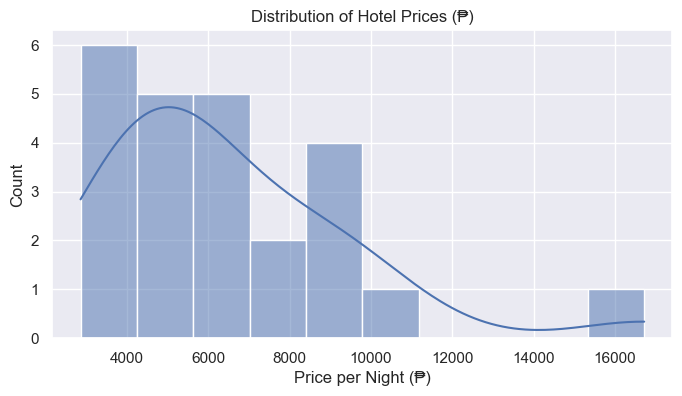

Findings: Prices are highly variable — from ₱705 to ₱9,800


In [27]:
print("1. Distribution of Hotel Prices")

plt.figure(figsize=(8, 4))
sns.histplot(df["Prices"], bins=10, kde=True)
plt.title("Distribution of Hotel Prices (₱)")
plt.xlabel("Price per Night (₱)")
plt.ylabel("Count")
plt.show()

print("Findings: Prices are highly variable — from ₱705 to ₱9,800")

### 2. Distribution of Ratings

2. Distribution of Ratings


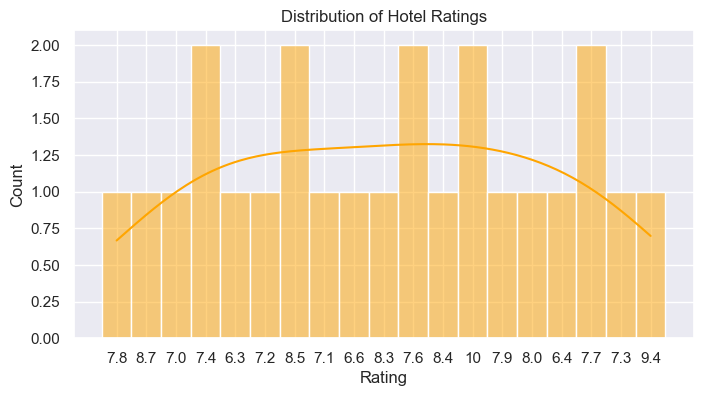

 Findings: Ratings cluster between 7 and 9 — generally high.


In [28]:
print("2. Distribution of Ratings")
plt.figure(figsize=(8, 4))
sns.histplot(df["Rating"], bins=10, kde=True, color="orange")
plt.title("Distribution of Hotel Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

print(" Findings: Ratings cluster between 7 and 9 — generally high.")

### 3. Price vs Rating

3. Price vs Rating


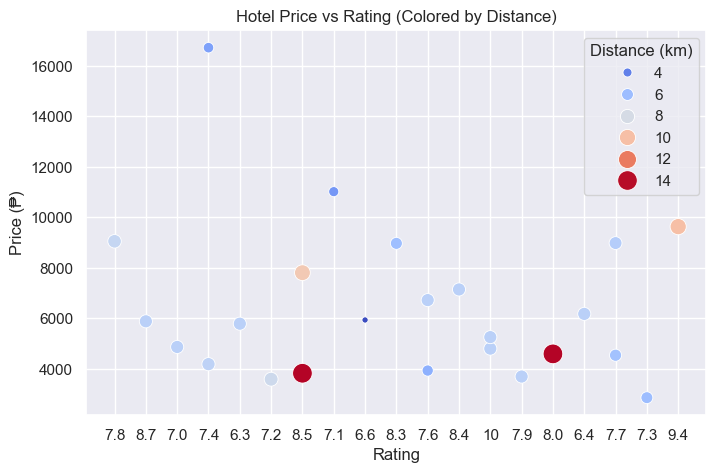

Findings: High price does not always mean high rating — expensive hotels can have average scores.


In [29]:
print("3. Price vs Rating")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Rating", y="Prices", hue="Distances", palette="coolwarm", size="Distances", sizes=(20, 200))
plt.title("Hotel Price vs Rating (Colored by Distance)")
plt.xlabel("Rating")
plt.ylabel("Price (₱)")
plt.legend(title="Distance (km)")
plt.show()

print("Findings: High price does not always mean high rating — expensive hotels can have average scores.")

### 4. Price vs Distance


4. Price vs Distance


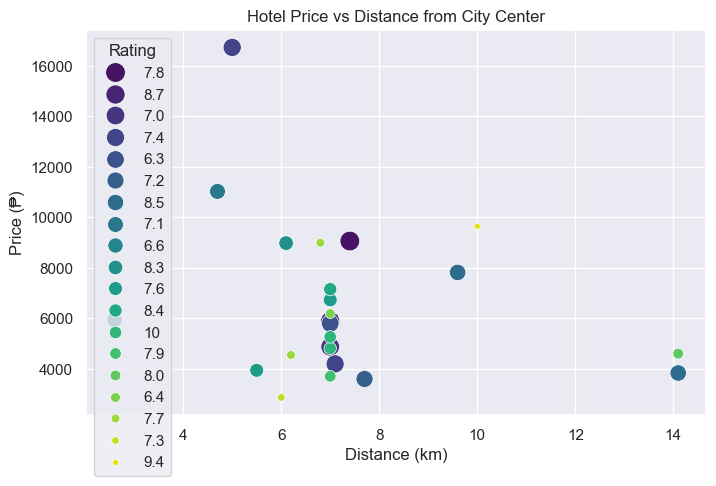

Findings: Distance vs Price is weakly correlated — closer hotels aren’t necessarily cheaper or more expensive.


In [30]:
print("4. Price vs Distance")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Distances", y="Prices", hue="Rating", palette="viridis", size="Rating", sizes=(20, 200))
plt.title("Hotel Price vs Distance from City Center")
plt.xlabel("Distance (km)")
plt.ylabel("Price (₱)")
plt.legend(title="Rating")
plt.show()

print("Findings: Distance vs Price is weakly correlated — closer hotels aren’t necessarily cheaper or more expensive.")

### 5. Correlation Heatmap


5. Correlation Heatmap


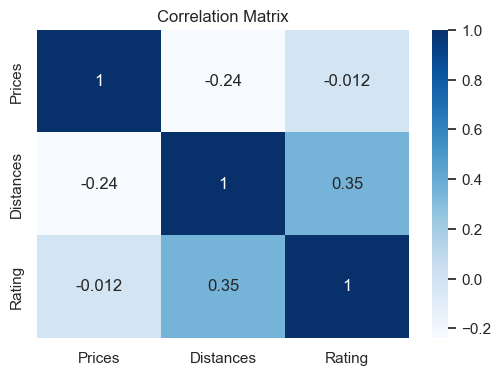

Findings: Correlation matrix shows weak correlation between rating, price, and distance.


In [31]:
print("5. Correlation Heatmap")
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Prices", "Distances", "Rating"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

print("Findings: Correlation matrix shows weak correlation between rating, price, and distance.")